In [90]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import j0

In [91]:
def regular(start, stop, points):
    return np.linspace(start, stop, points)
RNG = np.random.default_rng()

def uniform(start, stop, points, rng=RNG):
    return rng.uniform(start, stop, points)

def  recurring_quasirandom(start, stop, points):
    def _array01(points):
        s_0 = 0.5
        g = 1.32471795724474602596
        alpha = 1.0/g
        z = np.zeros((points,))
        z[0] = s_0 % 1
        for i in range(1,points):
            z[i] = (z[i-1]+alpha) % 1 
        return z
    params = (points,)
    return start + (stop - start) * _array01(*params)


In [92]:
points = [0., 20., 80]

x_reg = regular(*points)
x_uniform = uniform(*points)
x_recurring = recurring_quasirandom(*points)

zeros = np.zeros_like(x_reg)



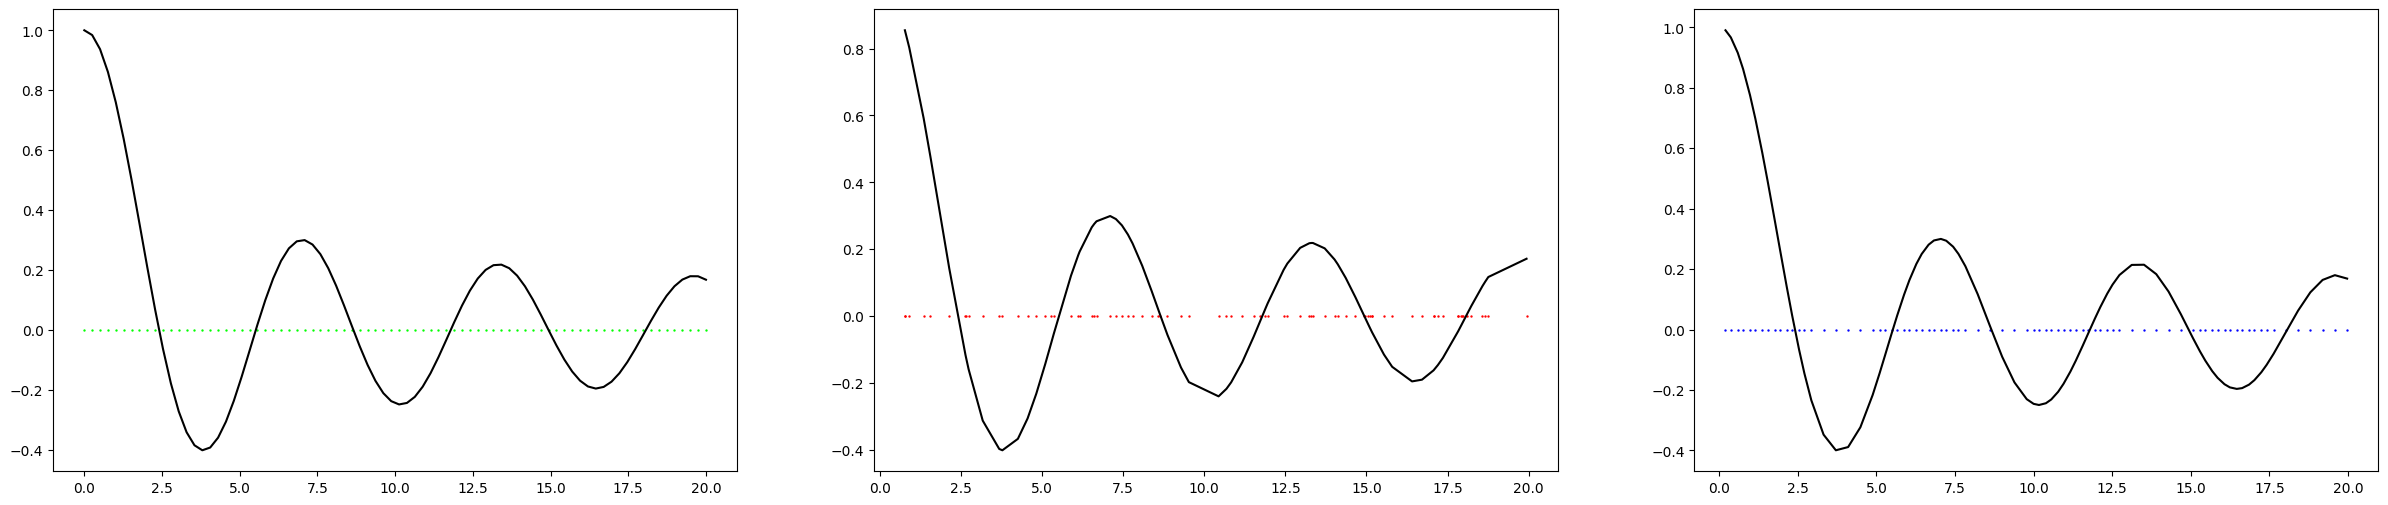

In [93]:
scale = 1.5
size = 0.5
figure, axs = plt.subplots(ncols=3, nrows=1, figsize=(20 * scale, 4 * scale))
axs[0].scatter(x_reg, zeros, s=size, color='lime')
axs[0].plot(x_reg, j0(x_reg), color='black')

axs[1].scatter(x_uniform, zeros, s=size, color='red')
axs[1].plot(sorted(x_uniform), j0(sorted(x_uniform)), color='black')

axs[2].scatter(x_recurring, zeros, s=size, color='blue')
axs[2].plot(sorted(x_recurring), j0(sorted(x_recurring)), color='black')
plt.show()